In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Decision Tree**

In [2]:
import pandas as pd


In [3]:
df = pd.read_csv('/content/drive/MyDrive/dataset_day8/salaries.csv')

In [4]:
df.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [7]:
inputs = df.drop('salary_more_then_100k', axis ='columns')

In [8]:
target = df['salary_more_then_100k']

In [9]:
inputs.head()

,company,job,degree
0,google,sales executive,bachelors
1,google,sales executive,masters
2,google,business manager,bachelors
3,google,business manager,masters
4,google,computer programmer,bachelors


In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in inputs:

  inputs[col] = le.fit_transform(inputs[col])

In [12]:
inputs.head()

,company,job,degree
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0


In [13]:
target.head()

0    0
1    0
2    1
3    1
4    0
Name: salary_more_then_100k, dtype: int64

In [14]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(inputs, target)



DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [15]:
model.score(inputs, target)

1.0

In [16]:
# Is salary of google, computer eng/prog, bachelors >100K ?
model.predict([[2,1,0]])

array([0])

[Text(133.92000000000002, 199.32, 'X[0] <= 0.5\ngini = 0.469\nsamples = 16\nvalue = [6, 10]'),
 Text(66.96000000000001, 163.07999999999998, 'X[2] <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(33.480000000000004, 126.83999999999999, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(100.44000000000001, 126.83999999999999, 'X[1] <= 1.0\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(66.96000000000001, 90.6, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(133.92000000000002, 90.6, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(200.88000000000002, 163.07999999999998, 'X[0] <= 1.5\ngini = 0.375\nsamples = 12\nvalue = [3, 9]'),
 Text(167.40000000000003, 126.83999999999999, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(234.36, 126.83999999999999, 'X[1] <= 0.5\ngini = 0.5\nsamples = 6\nvalue = [3, 3]'),
 Text(200.88000000000002, 90.6, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(267.84000000000003, 90.6, 'X[1] <= 1.5\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Te

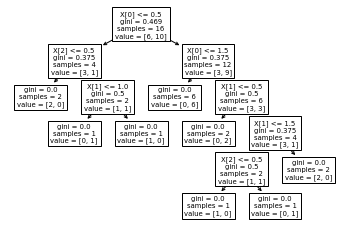

In [17]:
#Plotting the tree
from sklearn import tree
tree.plot_tree(model)

**GridSearchCV**

In [18]:
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split

In [20]:
dataset = load_breast_cancer()
X = dataset.data
Y = dataset.target

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size =0.3, random_state = 101)

model = SVC()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.95      0.85      0.90        66
           1       0.91      0.97      0.94       105

    accuracy                           0.92       171
   macro avg       0.93      0.91      0.92       171
weighted avg       0.93      0.92      0.92       171



In [21]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'gamma': ['scale', 'auto'],
    'kernel': ['linear']
}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3, n_jobs=-1)
grid.fit(X_train, y_train)

print(grid.best_params_)
grid_predictions = grid.predict(X_test)
print(classification_report(y_test, grid_predictions))


Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   25.9s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  1.3min finished


{'C': 100, 'gamma': 'scale', 'kernel': 'linear'}
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        66
           1       0.94      0.98      0.96       105

    accuracy                           0.95       171
   macro avg       0.96      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171

